In [198]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
#Libraries for data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#SVM
from sklearn import svm

#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [199]:
# import Dataset and Data cleaning

In [200]:
Data = pd.read_csv("spotify1.csv", encoding='ISO-8859-1')

In [201]:
Data.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


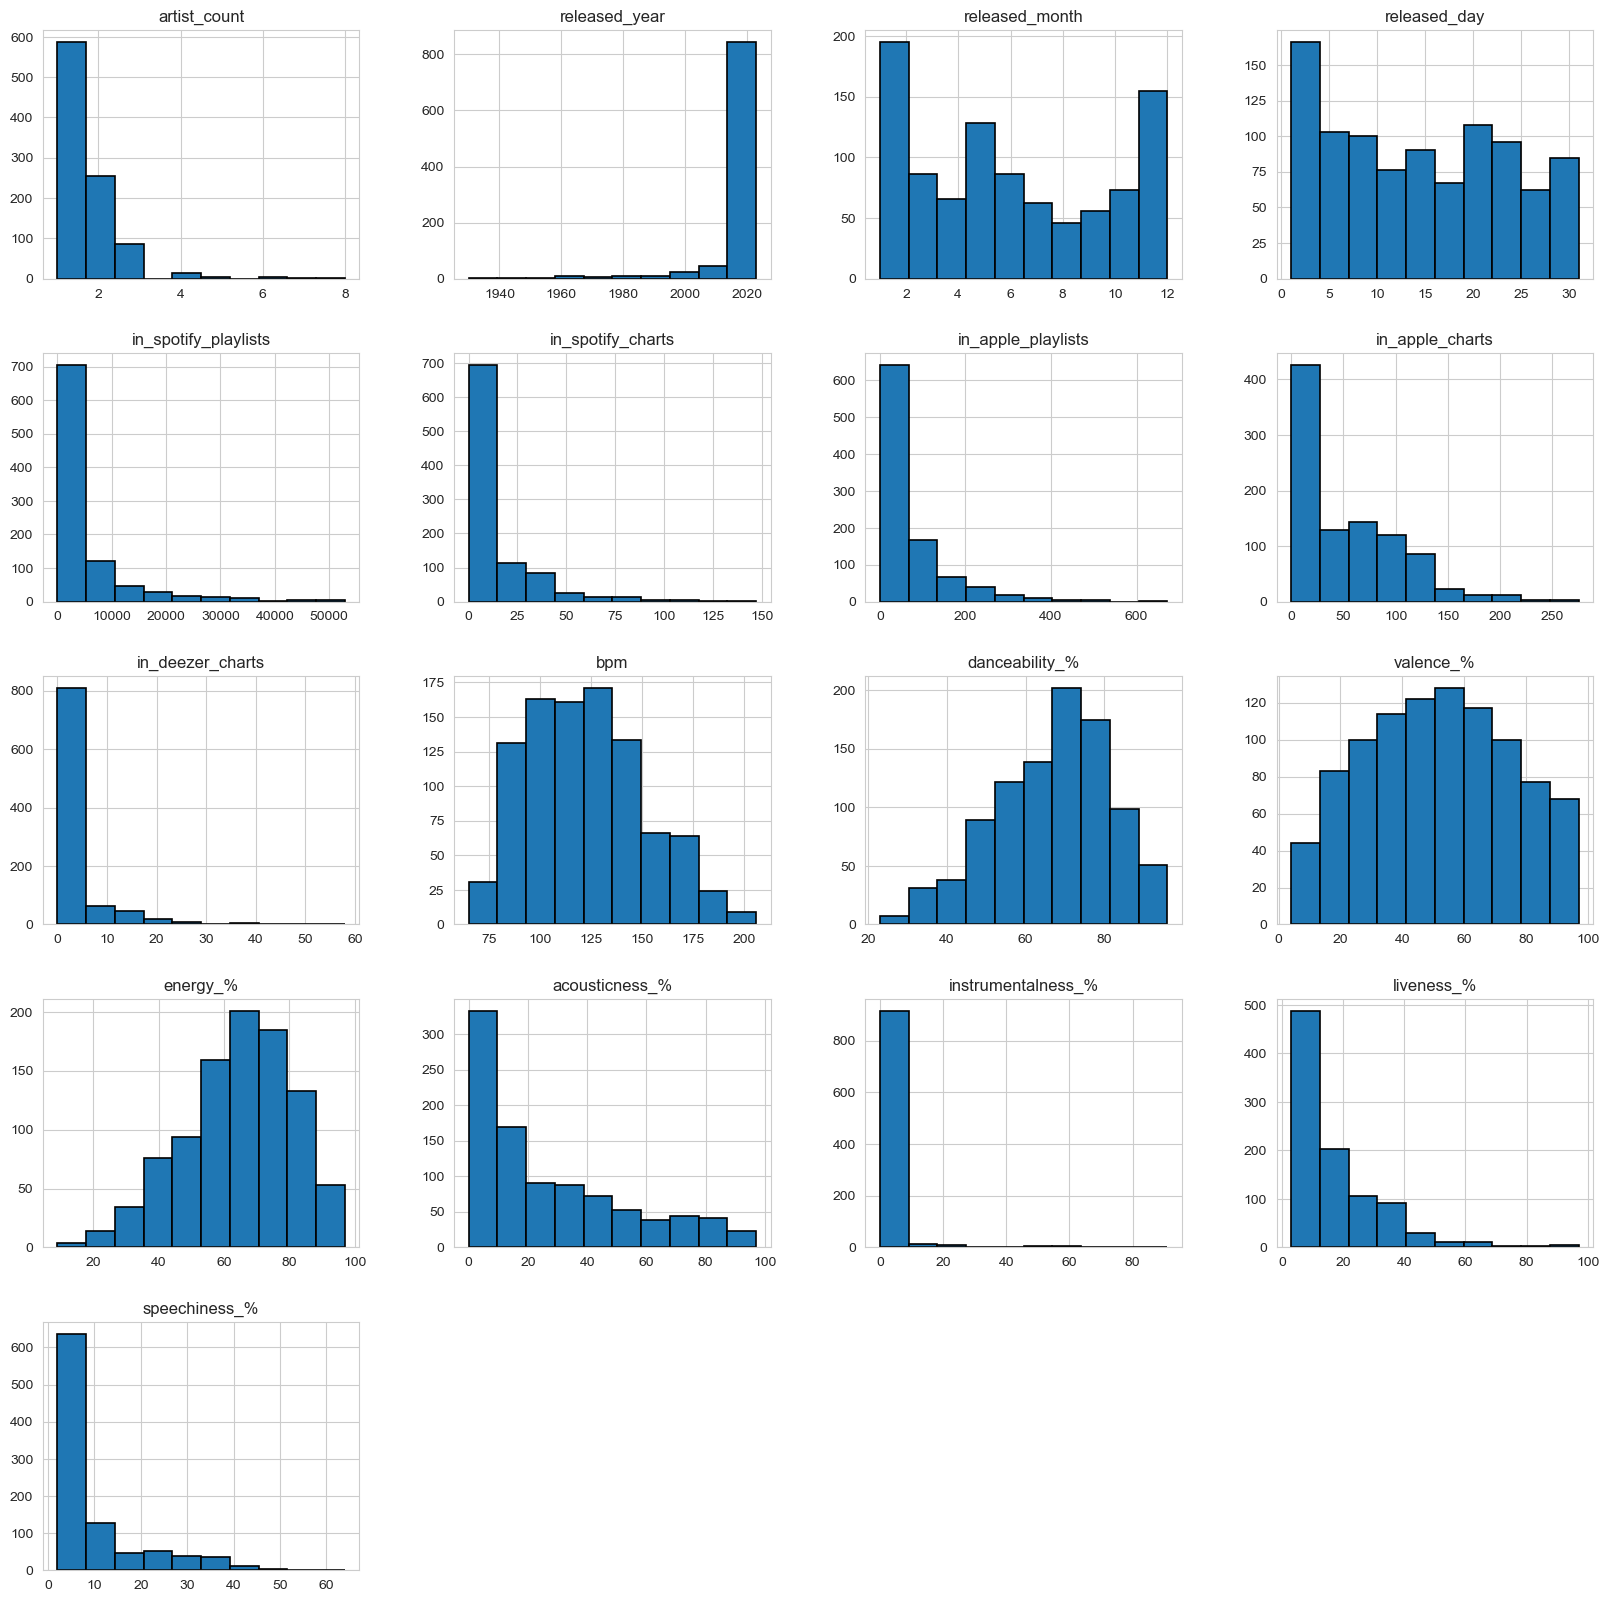

In [202]:
Data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))
plt.show()

In [203]:
Data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [204]:
Data.shape

(953, 24)

In [205]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [206]:
def convert_mode(mode):
    if mode == 'Major':
        return 1
    elif mode == 'Minor':
        return 2
    else:
        return None

Data['mode'] = Data['mode'].apply(convert_mode)

In [207]:
# Singers in total
artist_names = Data['artist(s)_name'].unique().tolist()
for artist in artist_names:
    print(artist)

total_artists = Data['artist(s)_name'].nunique()
print(f'Total number of artists: {total_artists}')

Latto, Jung Kook
Myke Towers
Olivia Rodrigo
Taylor Swift
Bad Bunny
Dave, Central Cee
Eslabon Armado, Peso Pluma
Quevedo
Gunna
Peso Pluma, Yng Lvcas
Bad Bunny, Grupo Frontera
NewJeans
Miley Cyrus
David Kushner
Harry Styles
SZA
Fifty Fifty
Billie Eilish
Feid, Young Miko
Jimin
Gabito Ballesteros, Junior H, Peso Pluma
Arctic Monkeys
Bizarrap, Peso Pluma
The Weeknd, Madonna, Playboi Carti
Fuerza Regida
Rï¿½ï¿½ma, Selena G
Tainy, Bad Bunny
Morgan Wallen
Dua Lipa
Troye Sivan
Peso Pluma, Grupo Frontera
The Weeknd, 21 Savage, Metro Boomin
Karol G, Shakira
Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk
Yahritza Y Su Esencia, Grupo Frontera
Junior H, Peso Pluma
Post Malone, Swae Lee
Bebe Rexha, David Guetta
Tyler, The Creator, Kali Uchis
Nicki Minaj, Aqua, Ice Spice
OneRepublic
The Weeknd
The Weeknd, Daft Punk
Ariana Grande, The Weeknd
Feid, Myke Towers, Sky Rompiendo
David Guetta, Anne-Marie, Coi Leray
Karol G
Peggy Gou
Tom Odell
Kali Uchis
Manuel Turizo
dennis, MC 

In [208]:
Data['streams'] = pd.to_numeric(Data['streams'], errors='coerce').fillna(0).astype(int)

In [209]:
Data['in_deezer_playlists'] = pd.to_numeric(Data['in_deezer_playlists'], errors='coerce').fillna(0).astype(int)

In [210]:
Data['in_shazam_charts'] = pd.to_numeric(Data['in_shazam_charts'], errors='coerce').fillna(0).astype(int)

In [211]:
Data['key'] = pd.to_numeric(Data['key'], errors='coerce').fillna(0).astype(int)

In [212]:
Data['artist(s)_name'] = pd.to_numeric(Data['artist(s)_name'], errors='coerce').fillna(0).astype(int)

In [213]:
bins = 7
Data['streams_range'] = pd.cut(Data['streams'], bins, labels=False)

In [243]:
max_value = Data['streams'].max()
bins = 7
bin_edges = np.linspace(0, max_value, bins + 1)
Data['streams_range'] = pd.cut(Data['streams'], bins=bin_edges, labels=False)
new_bin_edges = pd.cut(Data['streams'], bins=bin_edges).cat.categories
for edge in new_bin_edges:
    print(f"Bin range: {edge.left} to {edge.right}")


Bin range: 0.0 to 529127867.714
Bin range: 529127867.714 to 1058255735.429
Bin range: 1058255735.429 to 1587383603.143
Bin range: 1587383603.143 to 2116511470.857
Bin range: 2116511470.857 to 2645639338.571
Bin range: 2645639338.571 to 3174767206.286
Bin range: 3174767206.286 to 3703895074.0


In [214]:
#std_dev = Data['streams'].std()
#bin_edges = np.arange(Data['streams'].min(), Data['streams'].max() + std_dev, std_dev)

# Create a new column with bin labels
#labels = ['streams_sd__0', 'streams_sd_1', 'streams_sd_2', 'streams_sd_3', 'streams_sd_4', 'streams_sd_5', 'streams_sd_6']
#labels = list(range(7, -1, -1))
#Data['streams_range'] = pd.cut(Data['streams'], bins=bin_edges, labels=False)

# Count the occurrences in each bin
#bin_counts = Data['streams_range'].value_counts().sort_index()

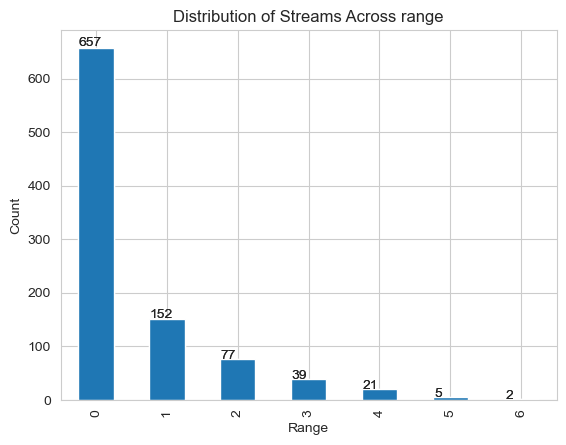

<Figure size 2000x1500 with 0 Axes>

In [215]:
Data['streams_range'].value_counts().plot(kind='bar')
ax = Data['streams_range'].value_counts().sort_index().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Range')
plt.ylabel('Count')
plt.title('Distribution of Streams Across range')
plt.figure(figsize=(20,15))
plt.show()

In [216]:
Data.info()
Data = Data.dropna(axis=1, how='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    int64 
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    in

In [217]:
Data = Data.drop(['track_name'], axis=1)

In [218]:
# Backward selection
X = Data.drop(['streams', 'streams_range'], axis=1)
y = Data['streams_range']

X = sm.add_constant(X)

p_values_dict = {}


while True:
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues.drop('const')
    max_p_value = p_values.max()

    if max_p_value > 0.05:
        feature_to_remove = p_values.idxmax()
        p_values_dict[feature_to_remove] = p_values[feature_to_remove]
        X = X.drop(feature_to_remove, axis=1)
    else:
        break

selected_features = X.columns.tolist()
print("Selected Features:", selected_features)

print("Columns and their p-values:")
for col in p_values_dict:
    print(f"{col}: {p_values_dict[col]}")

Selected Features: ['const', 'artist(s)_name', 'released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'key', 'valence_%', 'acousticness_%']
Columns and their p-values:
liveness_%: 0.992686023541067
mode: 0.9204383445605774
released_month: 0.8552747485618422
bpm: 0.6687624171216515
speechiness_%: 0.5860408462133606
energy_%: 0.5368390339044422
danceability_%: 0.4936508719392937
instrumentalness_%: 0.22882560800703433
released_day: 0.24235413468782666
in_apple_charts: 0.148316368842711
artist_count: 0.058450810034350834


In [219]:
#KNN without Backward selection

X = Data.drop(['streams', 'streams_range'], axis=1)
y = Data['streams_range'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 74.82517482517483%
Confusion Matrix:
 [[196   4   0   0   0   0   0]
 [ 35   9   4   0   0   0   0]
 [  9   4   5   1   0   0   0]
 [  1   3   2   3   1   0   0]
 [  1   1   1   2   1   0   0]
 [  0   0   0   0   2   0   0]
 [  0   0   0   0   1   0   0]]


In [220]:
# KNN with Backward selection
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

feature_columns = ['artist(s)_name', 'artist_count', 'released_year', 'in_spotify_playlists', 'in_spotify_charts',
                   'in_apple_playlists', 'in_deezer_playlists',
                   'in_deezer_charts', 'in_shazam_charts', 'key', 'valence_%', 'acousticness_%']

X = Data[feature_columns].values
y = Data['streams_range'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 76.57342657342657%
Confusion Matrix:
 [[197   3   0   0   0   0   0]
 [ 34  10   4   0   0   0   0]
 [  4   8   5   2   0   0   0]
 [  1   2   2   5   0   0   0]
 [  0   0   3   1   2   0   0]
 [  0   0   0   1   1   0   0]
 [  0   0   0   0   1   0   0]]


In [221]:
k_list = list(range(1,30,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y

<Figure size 640x480 with 0 Axes>

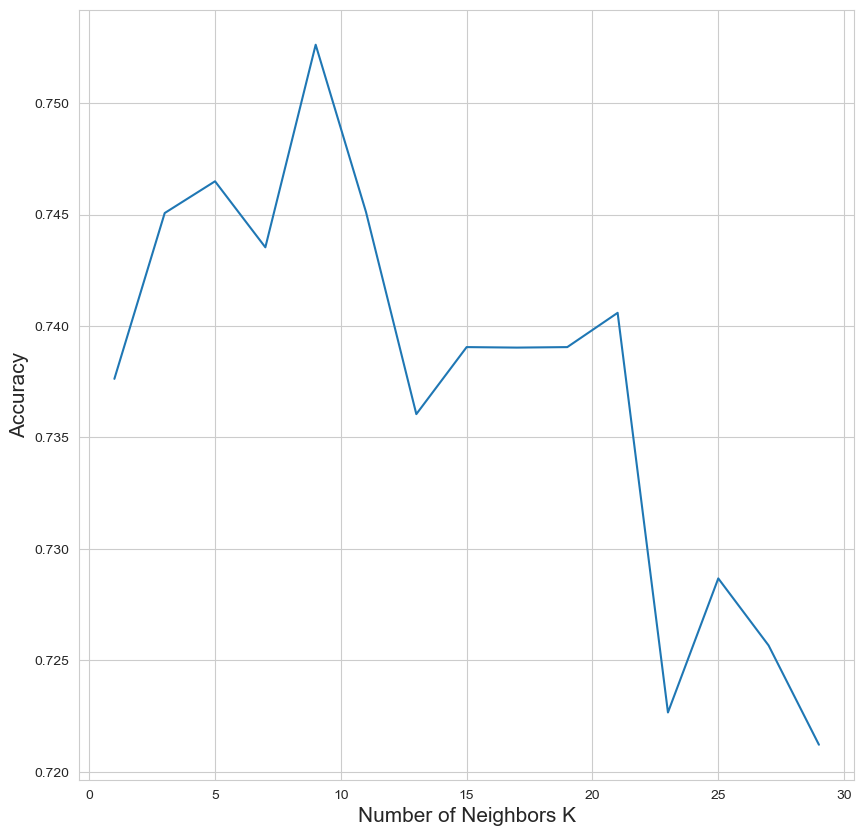

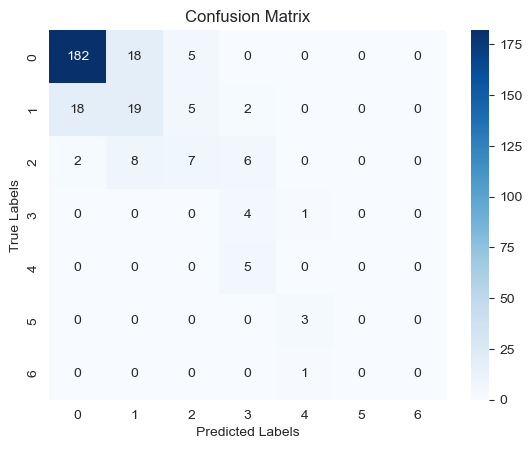

In [222]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [232]:
#Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#feature_columns = ['artist(s)_name', 'artist_count', 'released_year', 'in_spotify_playlists', 'in_spotify_charts',
                   #'in_apple_playlists', 'in_deezer_playlists',
                   #'in_deezer_charts', 'in_shazam_charts', 'key', 'valence_%', 'acousticness_%']
X = Data.drop(['streams', 'streams_range'], axis=1)
#X = Data[feature_columns].values
y = Data['streams_range']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[197   8   0   0   0   0   0]
 [ 24  14   6   0   0   0   0]
 [  2  12   7   2   0   0   0]
 [  0   0   0   4   1   0   0]
 [  0   0   1   2   2   0   0]
 [  0   0   0   0   3   0   0]
 [  0   0   0   0   1   0   0]]
0.7832167832167832


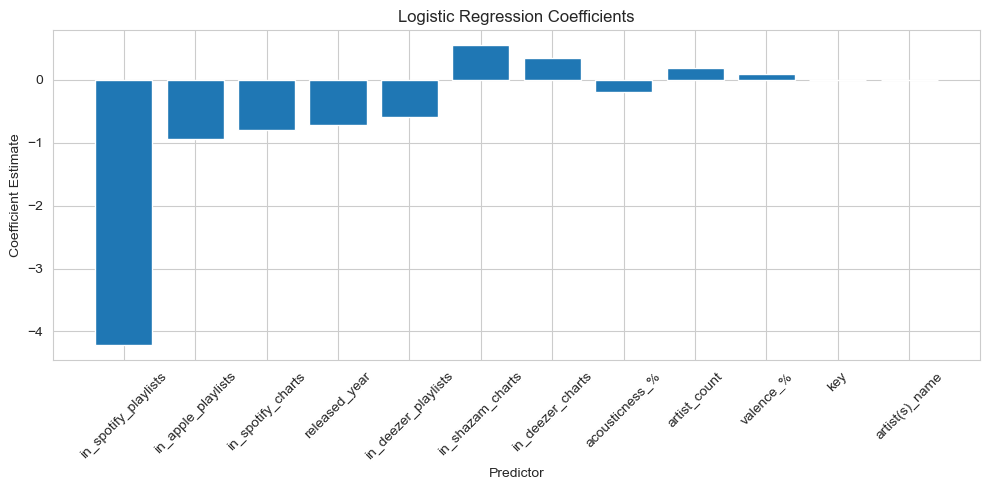

In [239]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming logreg is your trained logistic regression model
coefficients = logreg.coef_[0]  # Get the coefficients from the model
features = feature_columns  # List of feature names
indices = np.argsort(np.abs(coefficients))[::-1]  # Sort by magnitude

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.title('Logistic Regression Coefficients')
plt.bar(range(len(indices)), coefficients[indices], align='center')
plt.xticks(range(len(indices)), np.array(features)[indices], rotation=45)
plt.xlabel('Predictor')
plt.ylabel('Coefficient Estimate')
plt.tight_layout()
plt.show()


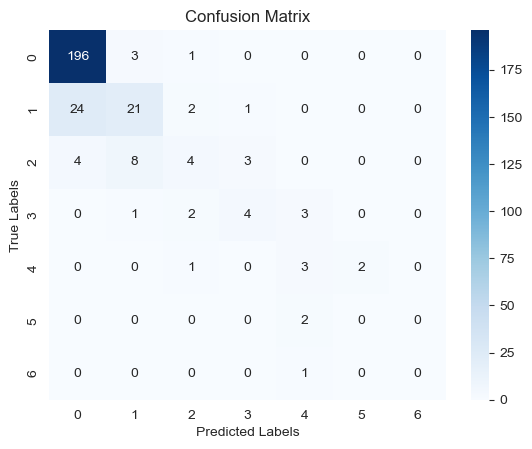

In [224]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [225]:
#SVM

In [226]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[194   6   0   0   0   0   0]
 [ 26  17   5   0   0   0   0]
 [  3  11   5   0   0   0   0]
 [  1   2   3   4   0   0   0]
 [  0   0   3   0   3   0   0]
 [  0   0   1   0   1   0   0]
 [  1   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       200
           1       0.47      0.35      0.40        48
           2       0.29      0.26      0.28        19
           3       1.00      0.40      0.57        10
           4       0.75      0.50      0.60         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.78       286
   macro avg       0.48      0.36      0.40       286
weighted avg       0.75      0.78      0.76       286



/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

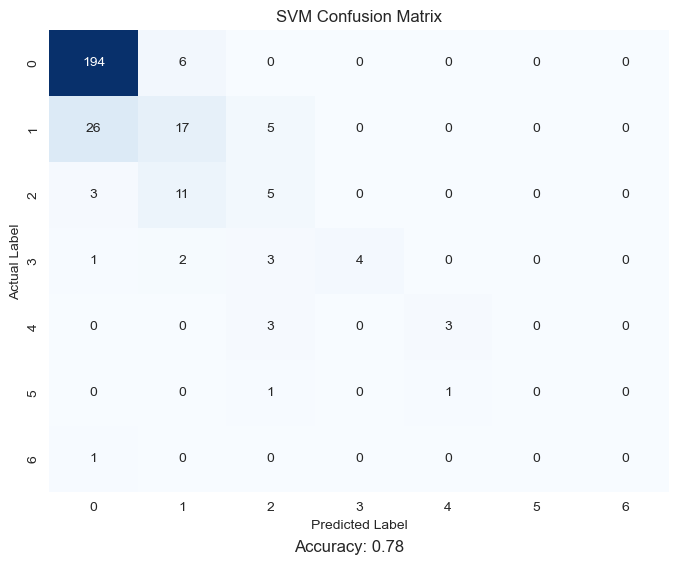

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       200
           1       0.47      0.35      0.40        48
           2       0.29      0.26      0.28        19
           3       1.00      0.40      0.57        10
           4       0.75      0.50      0.60         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.78       286
   macro avg       0.48      0.36      0.40       286
weighted avg       0.75      0.78      0.76       286



/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [227]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('SVM Confusion Matrix')
accuracy = np.trace(cm) / np.sum(cm).astype('float')
plt.figtext(0.5, 0.01, f'Accuracy: {accuracy:.2f}', ha='center', fontsize=12)
plt.show()
print(classification_report(y_test, y_pred))


In [228]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
feature_columns = ['artist(s)_name', 'artist_count', 'released_year', 'in_spotify_playlists', 'in_spotify_charts',
                   'in_apple_playlists', 'in_deezer_playlists',
                   'in_deezer_charts', 'in_shazam_charts', 'key', 'valence_%', 'acousticness_%']

X = Data[feature_columns].values
y = Data['streams_range'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8041958041958042


In [229]:
#Random Forest with Cross validation

from sklearn.model_selection import train_test_split, cross_val_score


cv_scores = cross_val_score(rf, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean()}")

/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.80628272 0.83246073 0.65968586 0.76315789 0.77368421]
Average CV Score: 0.7670542849269771


In [ ]:
#Feature Importance
import numpy as np

importances = rf.feature_importances_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [Data.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [123]:
monthly_streams = Data.groupby('released_month')['streams'].mean()
best_month = monthly_streams.idxmax()
print(f"The best month for release, based on average streams, is: {best_month}")

The best month for release, based on average streams, is: 9


In [124]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train);

In [125]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)



Accuracy: 0.7412587412587412
F1 Score: 0.7412719510012666


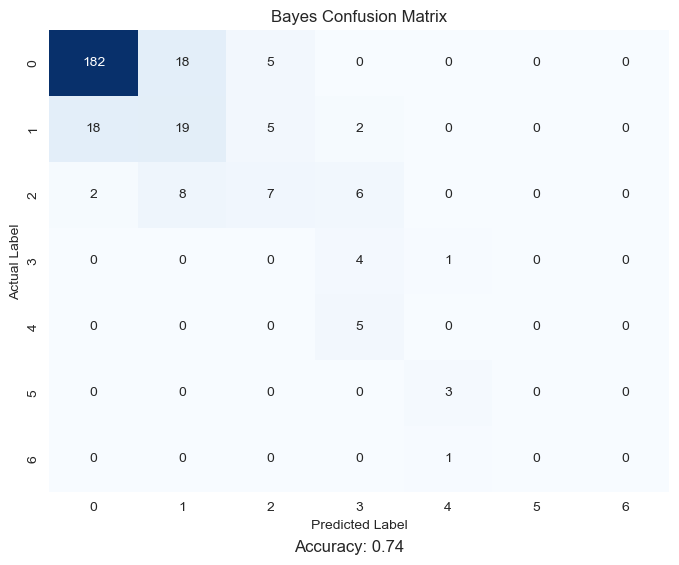

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       205
           1       0.42      0.43      0.43        44
           2       0.41      0.30      0.35        23
           3       0.24      0.80      0.36         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.74       286
   macro avg       0.28      0.35      0.29       286
weighted avg       0.75      0.74      0.74       286



/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco9951qq.com/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [126]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Bayes Confusion Matrix')
accuracy = np.trace(cm) / np.sum(cm).astype('float')
plt.figtext(0.5, 0.01, f'Accuracy: {accuracy:.2f}', ha='center', fontsize=12)
plt.show()
print(classification_report(y_test, y_pred))


In [127]:
# labels = [ "streams_sd 1","streams_sd 2","streams_sd 3","streams_sd 4","streams_sd 5","streams_sd 6", "streams_sd 7"]
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=labels)

# disp.plot()
# plt.xticks(rotation=45)
